In [1]:
import numpy as np
import h5py
import scipy.signal
import pandas as pd
import matplotlib.pyplot as plt
from skimage.util.montage import montage2d
from skimage.color import label2rgb
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
import os
%matplotlib inline

using -95330.554688 as threshold for ct
1
using 0.139025 as threshold for pet
using -85539.281250 as threshold for ct
2
using 0.816090 as threshold for pet
using -95422.281250 as threshold for ct
3
using 0.085084 as threshold for pet
<type 'list'>


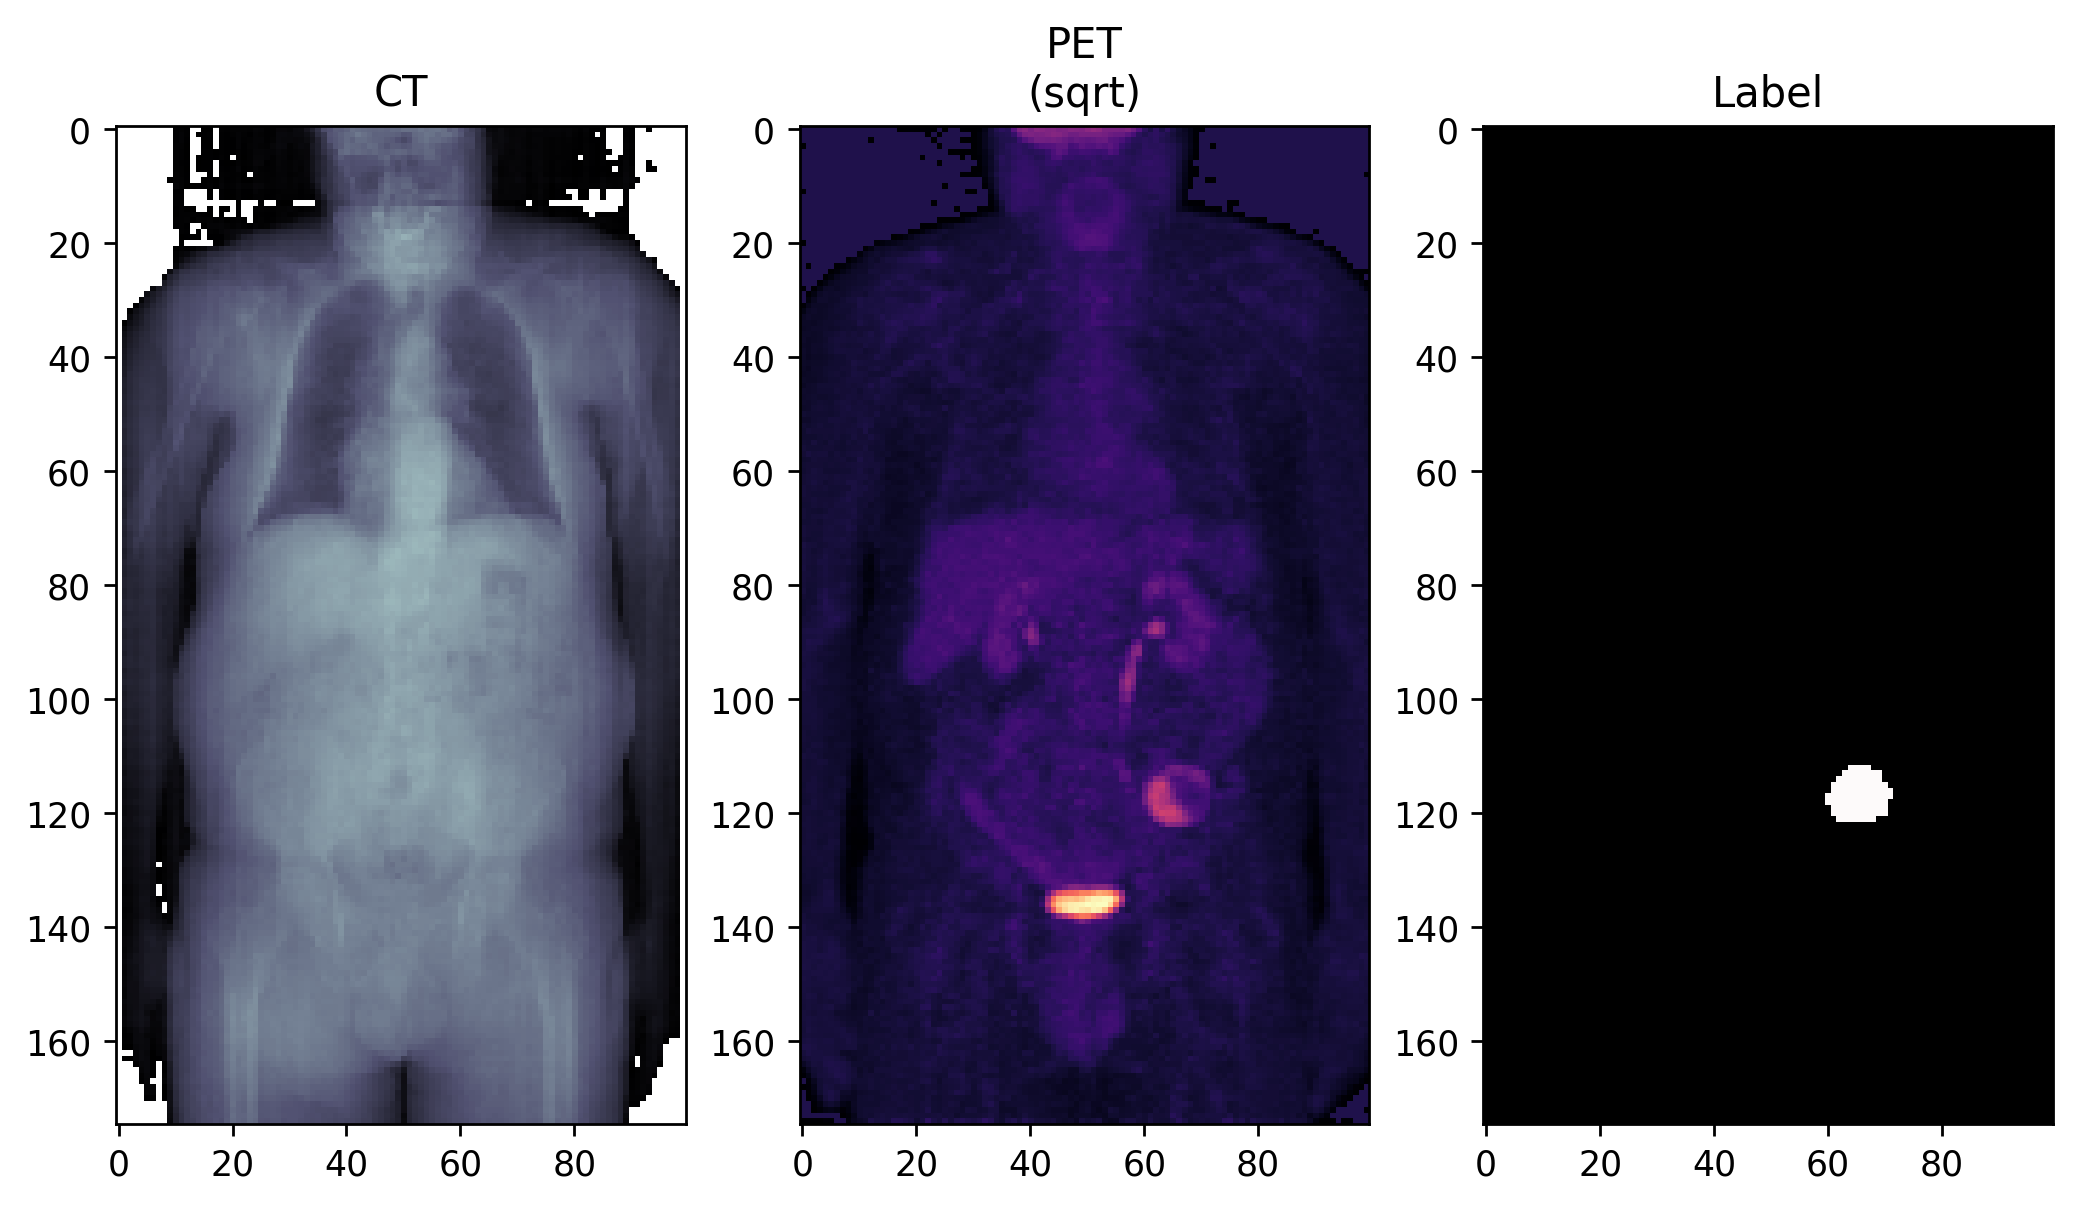

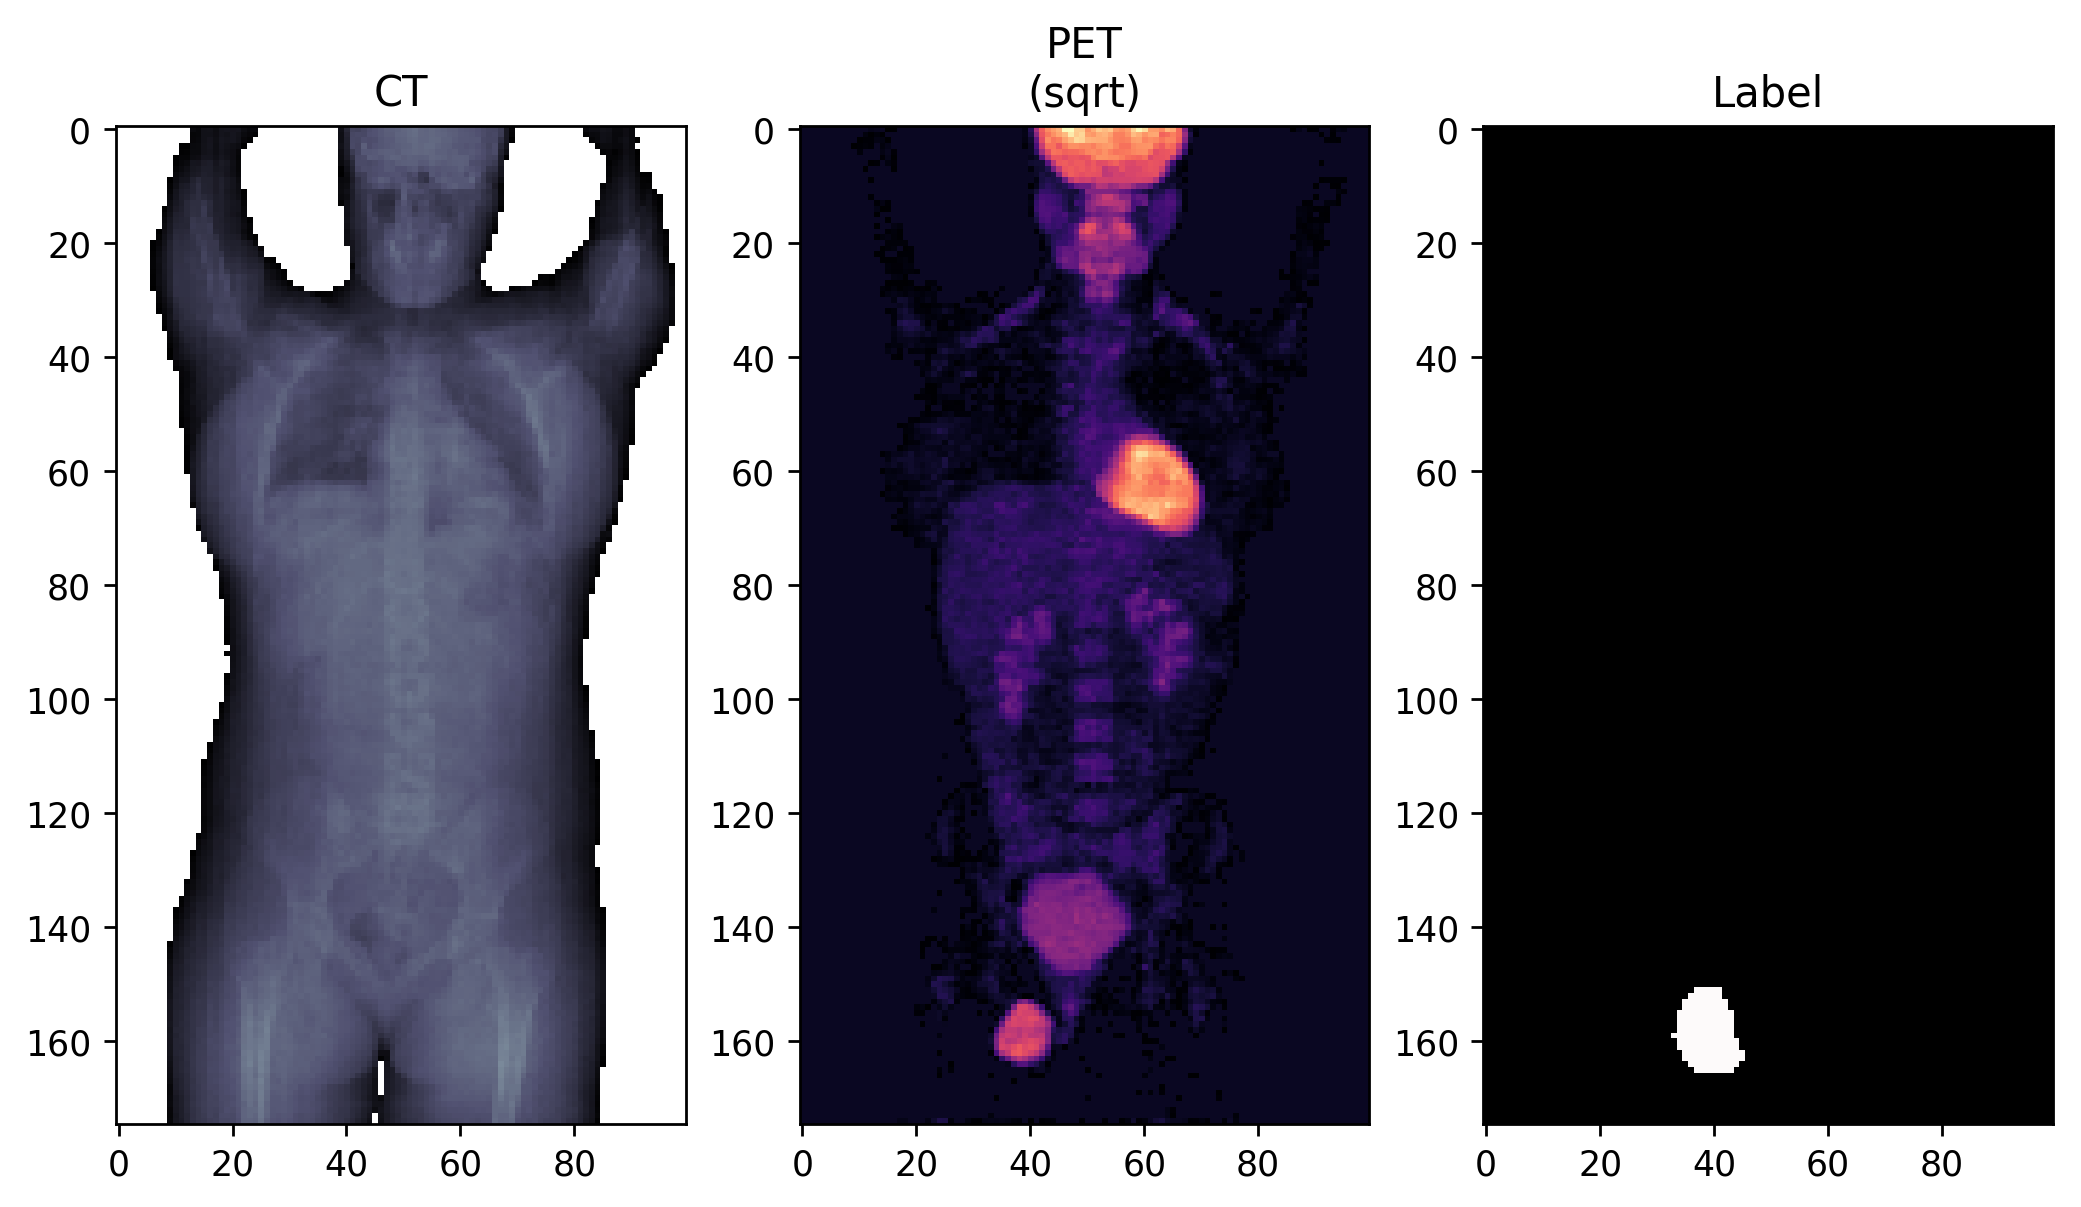

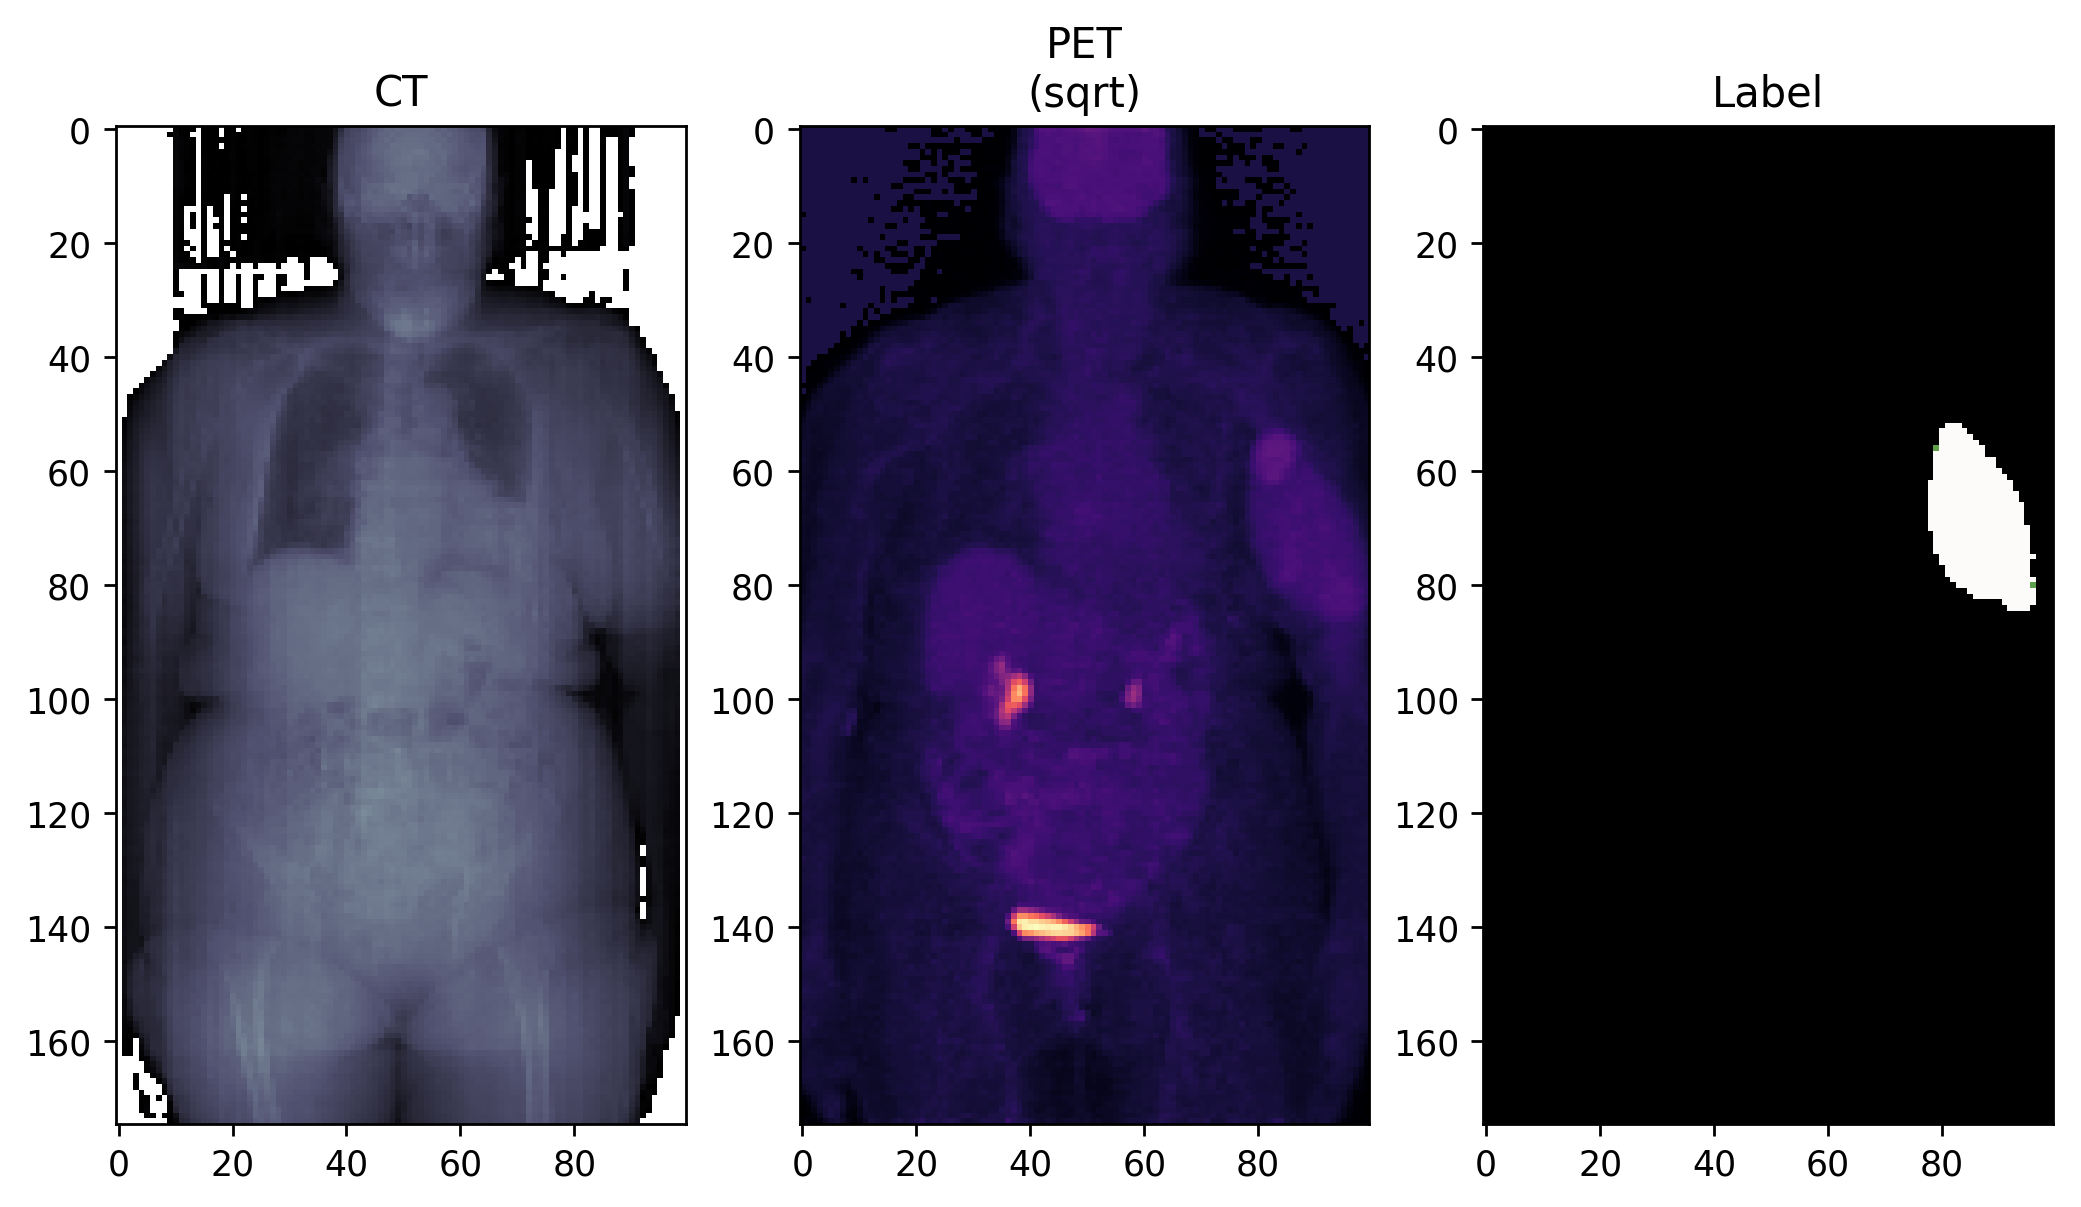

In [12]:
ct_data, pet_data, label_data, index = [], [], [], []
with h5py.File(os.path.join('..','input','lab_petct_vox_5.00mm.h5'),'r') as p_data:
    num=3
    #print(p_data['ct_data'].values()[0])
    for ct_img, pet_img, lab_img in zip(
                                   p_data['ct_data'].values(),
                                   p_data['pet_data'].values(),
                                   p_data['label_data'].values()
                                                           ):
        fig, (c_ax1, c_ax2, c_ax3) = plt.subplots(1, 3, figsize=(10, 10), dpi = 250)
        ct_data.append(np.sum(ct_img,1))
        pet_data.append(np.sum(pet_img,1))
        label_data.append(np.sum(lab_img,1))
        num=num-1
        
        css=np.sum(ct_img,1).squeeze()[::-1,:]
        threshold_ct = np.max(css[0:10,0:10])
        print('using %f as threshold for ct' % threshold_ct)
        css[np.where(css<threshold_ct)] = 255
        index.append (np.where(css<threshold_ct))
        print(len(index))
        c_ax1.imshow(css, cmap = 'bone')
        c_ax1.set_title('CT')
        c_ax1.axis('on')

        css=np.sqrt(np.max(pet_img,1)).squeeze()[::-1,:]
        threshold_pet = np.max(css[0:10,0:10])
        print('using %f as threshold for pet' % threshold_pet)
        css[np.where(css<threshold_pet)] = 1
        c_ax2.imshow(css, cmap = 'magma')
        c_ax2.set_title('PET\n(sqrt)')
        c_ax2.axis('on')
        
        c_ax3.imshow(np.max(lab_img,1).squeeze()[::-1,:], cmap = 'gist_earth')
        c_ax3.set_title('Label')
        c_ax3.axis('on')
        if num == 0:
            break
    print(type(index))

In [16]:
ct_tiles = []
pet_tiles = []
lab_tiles = []
tile_size=16
stride=3
for ct_img, pet_img, label in zip(ct_data, pet_data, label_data):
    for i in range(0,  ct_img.shape[0], tile_size):
        for j in range(0,  ct_img.shape[1], tile_size):
            for i_k in range(0, tile_size, stride):
                c=0
                for j_k in range(0, tile_size, stride):
                    c=c+1
                    ct_tiles += [ct_img[i+i_k:(i+i_k+tile_size),j+j_k:(j+j_k+tile_size)]]
                    pet_tiles += [pet_img[i+i_k:(i+i_k+tile_size),j+j_k:(j+j_k+tile_size)]]
                    lab_tiles += [label[i+i_k:(i+i_k+tile_size),j+j_k:(j+j_k+tile_size)]]
print((len(pet_tiles))) #- 2772

8316
